## Case Studies in Artificial Intelligence and Machine Learning

### Group 4
| Student Id     | Name                     |
|----------------|--------------------------|
| 9027375        | Khushbu Lad              |
| 8944328        | Akshata Madhav           |
| 8964515        | Neha Yadav               |
| 8965985        | Pradeepti Kasam          |
| 8914803        | Rohit Totlani            |

Dataset URL:

[Skin Cancer MNIST: HAM10000](https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000)

### Step 1: Install Required Libraries

In [3]:
!pip install pandas numpy matplotlib seaborn scipy scikit-learn

### Step 2: Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import sys
import os

### Step 3: Load the Dataset

**NOTE:**

- Our dataset is large containing images of 2.9GB.
- The file is configured as it can run in local as well as in google collab.
- if you are setting up file for google drive, no configuration is requred.
- if this project needs to setup in local device, download the dataset from link in header and extract zip in "dataset" folder in project directory
- Set the correct file path for the dataset:
- data_path = "/content/HAM10000_metadata.csv"
- Ensure that the path is updated to match the actual location of the file on your system.


In [5]:
# Detect Google Colab
IN_COLAB = False
try:
    import google.colab
    IN_COLAB = True
except ModuleNotFoundError:
    pass

In [6]:
# Detect Google Colab
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    DATA_PATH = "/content/drive/MyDrive/dataset/"
else:
    DATA_PATH = "./"

# Download dataset in kaggle
if IN_COLAB and not os.path.exists(DATA_PATH + "HAM10000_metadata.csv"):
    !pip install kaggle
    from google.colab import files
    files.upload()  # Upload kaggle.json manually (for API authentication)

    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    !kaggle datasets download -d kmader/skin-cancer-mnist-ham10000 -p {DATA_PATH} --unzip
    print("Dataset downloaded and extracted.")

# Initialize required path
metadata_path = os.path.join(DATA_PATH, "HAM10000_metadata.csv")
images_path = os.path.join(DATA_PATH, "HAM10000_images_part_1/")

df = pd.read_csv(metadata_path)

Mounted at /content/drive


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#code to check sample data
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


### Step 4: Basic Exploration

In [9]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])
print("\n")
print("Column Names:", df.columns)
print("\n")
print("Missing Values:\n", df.isnull().sum())

Number of rows:  10015
Number of columns:  7


Column Names: Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')


Missing Values:
 lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


### Step 5: Data Preprocessing


1. Age column has 57 missing value, updating missing value with median

In [10]:
# Fill missing age values with the median age
df['age'] = df['age'].fillna(df['age'].median())

2. There are 3 categorical variables, Using label encoder to convert these string to numerical columns
    1. Gender
    2. Diagnosis class
    3. Localization


In [11]:
# Encode categorical variables
le_sex = LabelEncoder()
# 0 = Female, 1 = Male, 2= unknown
df['sex'] = le_sex.fit_transform(df['sex'])

le_dx = LabelEncoder()
# Encodes the 7 diagnosis classes
#0-akiec, 1-bcc, 2-bkl, 3-df, 4-mel, 5-nv, 6-vasc
df['dx'] = le_dx.fit_transform(df['dx'])

le_localization = LabelEncoder()
# Encodes the 15 localization classes
# 0-abdomen, 1- acral, 2-back, 3-chest, 4- ear, 5-face, 6-foot, 7-genital, 8-hand, 9-lower extremity, 10-neck, 11-scalp, 12-trunk, 13-unknown, 14-upper extremity
df['localization'] = le_localization.fit_transform(df['localization'])

#check sample data
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,2,histo,80.0,1,11
1,HAM_0000118,ISIC_0025030,2,histo,80.0,1,11
2,HAM_0002730,ISIC_0026769,2,histo,80.0,1,11
3,HAM_0002730,ISIC_0025661,2,histo,80.0,1,11
4,HAM_0001466,ISIC_0031633,2,histo,75.0,1,4


### Step 6: Exploratory Data Analysis (EDA)

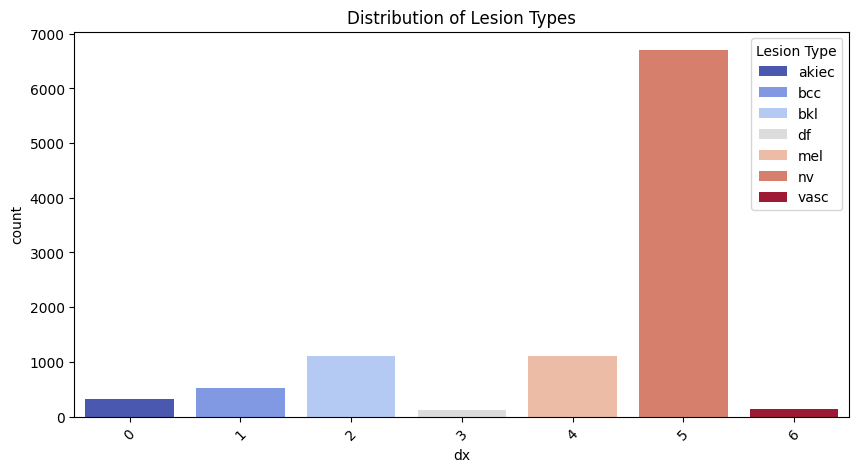

In [12]:
# Plot class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='dx', hue='dx', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Distribution of Lesion Types")

# Create custom legend labels
legend_labels = {
    0: 'akiec',
    1: 'bcc',
    2: 'bkl',
    3: 'df',
    4: 'mel',
    5: 'nv',
    6: 'vasc'
}

# Get the current handles and labels from the plot
handles, labels = plt.gca().get_legend_handles_labels()

# Create a new list of legend labels using the custom mapping
new_labels = [legend_labels[int(label)] for label in labels]

# Create the legend with the updated labels
plt.legend(handles, new_labels, title='Lesion Type')

plt.show()


#### Type of lesions

- akiec (Actinic keratoses and intraepithelial carcinoma)
- bcc (Basal cell carcinoma)
- bkl (Benign keratosis-like lesions)
- df (Dermatofibroma)
- mel (Melanoma)
- nv (Melanocytic nevi)
- vasc (Vascular lesions)

The plot above suggests that melanocytic nevi are the most common type of skin lesion in the dataset.

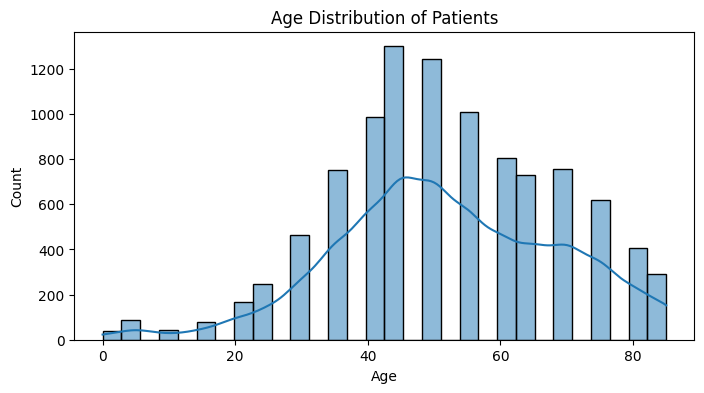

In [13]:
# Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.show()

- The plot represents the age distribution of patients in the dataset.
- It shows that most patients are between 30 and 60 years old, with a peak around the 40s.
- The distribution indicates a higher frequency of older patients compared to younger ones.

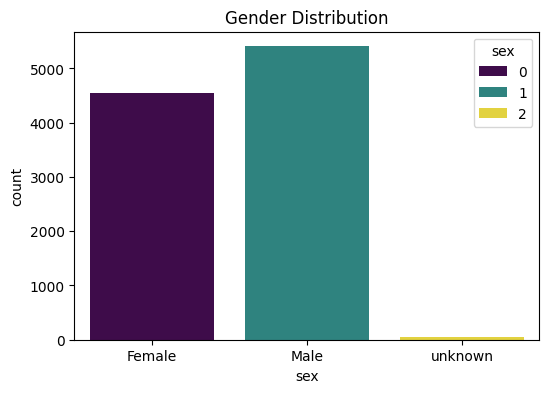

In [14]:
# Sex distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='sex', data=df, palette='viridis')
plt.xticks(ticks=[0, 1, 2], labels=['Female', 'Male', 'unknown'])
plt.title("Gender Distribution")
plt.show()

- The plot indicates that Males are most affected with skin cancer as compared to females and unknown

### Step 7: Statistical Tests

**t-test:**

A t-test is a statistical test used to compare the means of two groups to determine if they are significantly different from each other. It is commonly used in hypothesis testing.

**Benign Lesions**
The benign category includes non-cancerous (harmless) lesions:
bkl (Benign keratosis-like lesions)
nv (Melanocytic nevi - common moles)
These lesions are generally not life-threatening and do not spread aggressively.

**Malignant Lesions**
The malignant category includes cancerous (harmful) lesions:
mel (Melanoma - the deadliest form of skin cancer)
bcc (Basal cell carcinoma - a slow-growing skin cancer)
akiec (Actinic keratoses and intraepithelial carcinoma - precancerous/cancerous growths)
These lesions have the potential to invade nearby tissues and spread if not treated.

In [15]:
# Hypothesis: Is there a significant difference in age between benign & malignant lesions?
benign = df[df['dx'].isin([le_dx.transform(['bkl'])[0], le_dx.transform(['nv'])[0]])]['age']
malignant = df[df['dx'].isin([le_dx.transform(['mel'])[0], le_dx.transform(['bcc'])[0], le_dx.transform(['akiec'])[0]])]['age']

In [16]:
# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(benign, malignant, equal_var=False)
print(f"T-test result: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("\n Statistically significant difference in age between benign and malignant lesions.")
else:
    print("\n No significant difference in age between benign and malignant lesions.")

T-test result: t-statistic = -37.9242, p-value = 0.0000

 Statistically significant difference in age between benign and malignant lesions.


### Step 8: Hypothesis Evaluation

**Chi-Square Test :**

The Chi-Square test is a statistical test used to determine if there is a significant association between categorical variables. In this dataset, it can be applied to check if factors like lesion type and patient gender are independent or correlated.

In [17]:
# Chi-Square test for gender distribution across lesion types
contingency_table = pd.crosstab(df['sex'], df['dx'])
chi2_stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2 = {chi2_stat:.4f}, p-value = {p:.4f}")
if p < 0.05:
    print("\n Statistically significant association between gender and lesion type.")
else:
    print("\n No significant association between gender and lesion type.")

Chi-Square Test: chi2 = 106.9038, p-value = 0.0000

 Statistically significant association between gender and lesion type.


### Step 9: Observations & Summary

**Key Findings**

**Statistical Tests & Hypothesis Evaluation**

t-test was conducted to compare means between different groups.

Chi-Square test for gender distribution across lesion types.

**Potential Challenges**

Class Imbalance:

Some lesion types (e.g., Melanocytic nevi) dominate, while others are underrepresented.

This could bias the model toward predicting the most common class.

**Data Bias:**

Higher representation of certain age groups may lead to a model that performs better on middle-aged individuals but poorly on younger or older patients.

**Feature Engineering Needed:**

Image-based features may need augmentation techniques to balance classes.

1. Load & Preprocess the Data
Load HAM10000_metadata.csv and image files.

Join metadata with image data.

Encode categorical labels (e.g., lesion types).

Resize images (e.g., 64x64 or 128x128) and normalize pixel values (divide by 255).

In [18]:
import os
import cv2
from tqdm import tqdm  # for progress bar

# Define image folders
images_path_1 = os.path.join(DATA_PATH, "HAM10000_images_part_1/")
images_path_2 = os.path.join(DATA_PATH, "HAM10000_images_part_2/")

# Define paths for saved numpy arrays
image_data_path = os.path.join(DATA_PATH, "image_data.npy")
labels_path = os.path.join(DATA_PATH, "labels.npy")

# Check if the processed data already exists
if os.path.exists(image_data_path) and os.path.exists(labels_path):
    # Load the data from disk
    image_data_array = np.load(image_data_path)
    labels_array = np.load(labels_path)
    print("Processed images and labels loaded from disk.")
else:
  # Initialize lists
  image_data = []
  labels = []
  missing_images = []

  print(" Loading and processing images...")

  for idx, row in tqdm(df.iterrows(), total=len(df)):
      filename = row['image_id'] + ".jpg"
      label = row['dx']

      # Build image paths
      path1 = os.path.join(images_path_1, filename)
      path2 = os.path.join(images_path_2, filename)

      # Load image from available path
      img = None
      if os.path.exists(path1):
          img = cv2.imread(path1)
      elif os.path.exists(path2):
          img = cv2.imread(path2)

      # Skip and log if not loaded properly
      if img is None or img.size == 0:
          missing_images.append(filename)
          continue

      # Preprocess: resize and convert color
      img = cv2.resize(img, (64, 64))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

      image_data.append(img)
      labels.append(label)

  print(f"\n Total images loaded: {len(image_data)}")
  print(f"Missing or unreadable images: {len(missing_images)}")
  # Convert lists to numpy arrays
  image_data_array = np.array(image_data)
  labels_array = np.array(labels)
  # Save the arrays to disk
  np.save(image_data_path, image_data_array)
  np.save(labels_path, labels_array)
  print("Processed Images successfully saved to drive");


Processed images and labels loaded from disk.


Convert Data to NumPy Arrays

In [35]:
import numpy as np

X = image_data_array
y = df["dx"]

print("Data shapes:")
print("Images (X):", X.shape)
print("Labels (y):", y.shape)


Data shapes:
Images (X): (10015, 64, 64, 3)
Labels (y): (10015,)


Encode Labels (String → Integer → One-hot)

In [36]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Use the original labels, not the unique classes
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['dx'].values)  # Assuming 'df' is your DataFrame with original labels in 'dx' column

# One-hot encode the integer labels
y_onehot = to_categorical(y_encoded)

print("Unique classes:", label_encoder.classes_)
print("Encoded labels shape:", y_onehot.shape)

Unique classes: [0 1 2 3 4 5 6]
Encoded labels shape: (10015, 7)


In [45]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Use original string labels from 'dx'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['dx'].values)  # labels should be string list from earlier
y_onehot = to_categorical(y_encoded)

# Get class names as string list
class_names = label_encoder.classes_

print("Classes:", class_names)


Classes: [0 1 2 3 4 5 6]


Train-Test Split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y_onehot,
        test_size=0.2,
        random_state=42,
        stratify=y_onehot
    )

Build a CNN Model

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the path where you want to save the model
model_path = os.path.join(DATA_PATH, "skin_cancer_detection_model_40Epoch.h5")

# Check if the model file exists
if (False and os.path.exists(model_path)):
    # Load the model
    model = load_model(model_path)
    print("Model loaded from disk.")
else:
    print("No saved model found. Proceeding with training a new model.")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y_onehot,
        test_size=0.2,
        random_state=42,
        stratify=y_onehot
    )

    print("Train shape:", X_train.shape)
    print("Test shape:", X_test.shape)


    # Normalize image pixels
    X_train = X_train / 255.0
    X_test = X_test / 255.0

    # Build CNN
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(y_train.shape[1], activation='softmax')  # 7 output classes
    ])

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    # Train
    history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

    # Save the model
    model.save(model_path)
    print(f"Model saved to: {model_path}")





No saved model found. Proceeding with training a new model.
Train shape: (8012, 64, 64, 3)
Test shape: (2003, 64, 64, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,626,055 (6.20 MB)

 Trainable params: 1,626,055 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6461 - loss: 1.1104 - val_accuracy: 0.6695 - val_loss: 0.9074
Epoch 2/40
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6702 - loss: 0.9369 - val_accuracy: 0.6785 - val_loss: 0.8626
Epoch 3/40
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6726 - loss: 0.8991 - val_accuracy: 0.6820 - val_loss: 0.8388
Epoch 4/40
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6867 - loss: 0.8583 - val_accuracy: 0.6915 - val_loss: 0.8145
Epoch 5/40
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6983 - loss: 0.7981 - val_accuracy: 0.7104 - val_loss: 0.7701
Epoch 6/40
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7039 - loss: 0.7830 - val_accuracy: 0.7084 - val_loss: 0.7661
Epoch 7/40
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7094 - loss: 0.7629 - val_accuracy: 0.7104 - val_loss: 0.7641
Epoch 8/40
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7216 - loss: 0.7398 - val_accuracy: 0

Model saved to: /content/drive/MyDrive/dataset/skin_cancer_detection_model_40Epoch.h5


Plot Training & Validation Accuracy and Loss

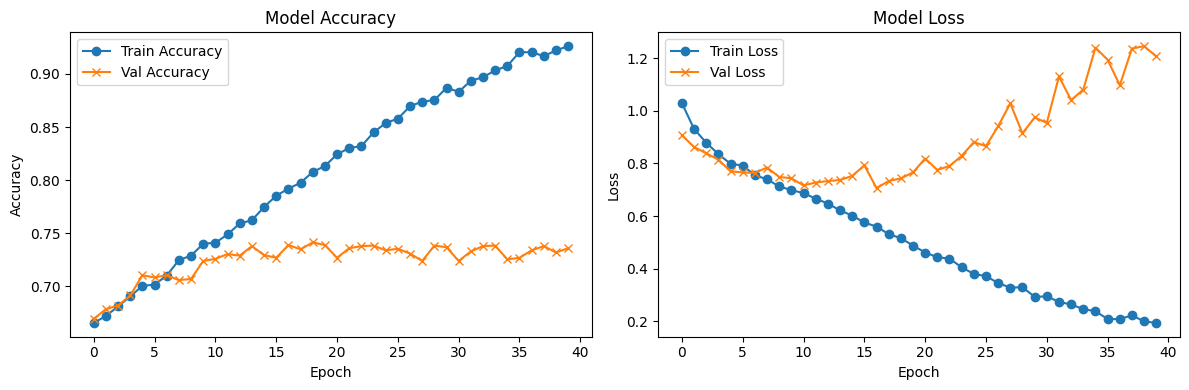

In [64]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='x')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Evaluate with Confusion Matrix

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


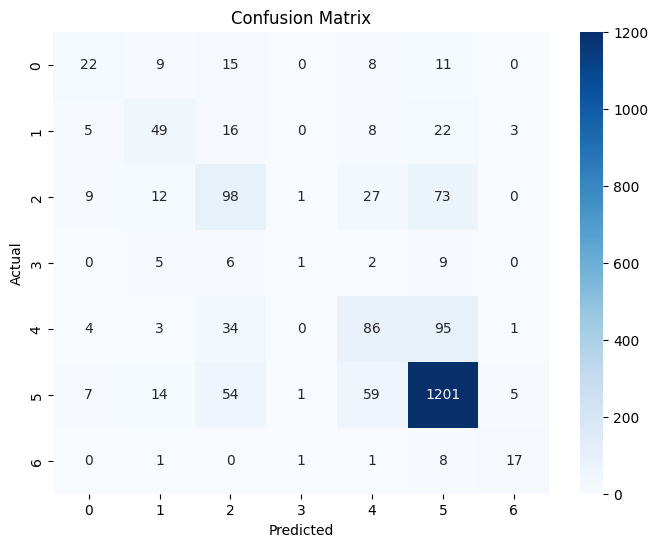

Classification Report:

              precision    recall  f1-score   support

           0       0.47      0.34      0.39        65
           1       0.53      0.48      0.50       103
           2       0.44      0.45      0.44       220
           3       0.25      0.04      0.07        23
           4       0.45      0.39      0.42       223
           5       0.85      0.90      0.87      1341
           6       0.65      0.61      0.63        28

    accuracy                           0.74      2003
   macro avg       0.52      0.46      0.47      2003
weighted avg       0.72      0.74      0.73      2003



In [65]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = label_encoder.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Convert label_encoder.classes_ to string list
class_names = [str(c) for c in label_encoder.classes_]

# Print classification report with zero_division to suppress warnings
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))




Extend the Metadata with Synthetic Columns

In [67]:
import pandas as pd
import random

# Load your metadata if you haven't already
metadata_path = os.path.join(DATA_PATH, "HAM10000_metadata.csv")
df = pd.read_csv(metadata_path)

# Optional: Reset index if needed
df = df.reset_index(drop=True)

# Define synthetic values
professions = ['farmer', 'teacher', 'construction worker', 'office worker', 'student', 'factory worker', 'driver', 'retired']

sun_exposure_map = {
    'farmer': 'yes',
    'construction worker': 'yes',
    'driver': 'yes',
    'teacher': 'no',
    'office worker': 'no',
    'student': 'no',
    'factory worker': 'no',
    'retired': random.choice(['yes', 'no'])
}

chemical_exposure_map = {
    'factory worker': 'yes',
    'construction worker': 'yes',
    'farmer': 'yes',
    'teacher': 'no',
    'office worker': 'no',
    'student': 'no',
    'driver': 'no',
    'retired': random.choice(['yes', 'no'])
}

# Add synthetic columns
df['profession'] = [random.choice(professions) for _ in range(len(df))]
df['sun_exposed'] = df['profession'].apply(lambda x: sun_exposure_map.get(x, 'no'))
df['chemical_exposed'] = df['profession'].apply(lambda x: chemical_exposure_map.get(x, 'no'))

# Define binary cancer diagnosis
cancer_types = ['mel', 'bcc', 'akiec']
df['cancer_diagnosed'] = df['dx'].apply(lambda x: 'yes' if x in cancer_types else 'no')

print(" Metadata extended with synthetic features.")
df.head()


 Metadata extended with synthetic features.


,lesion_id,image_id,dx,dx_type,age,sex,localization,profession,sun_exposed,chemical_exposed,cancer_diagnosed
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,driver,yes,no,no
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,driver,yes,no,no
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,construction worker,yes,yes,no
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,farmer,yes,yes,no
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,factory worker,no,yes,no


In [ ]:
df.count()

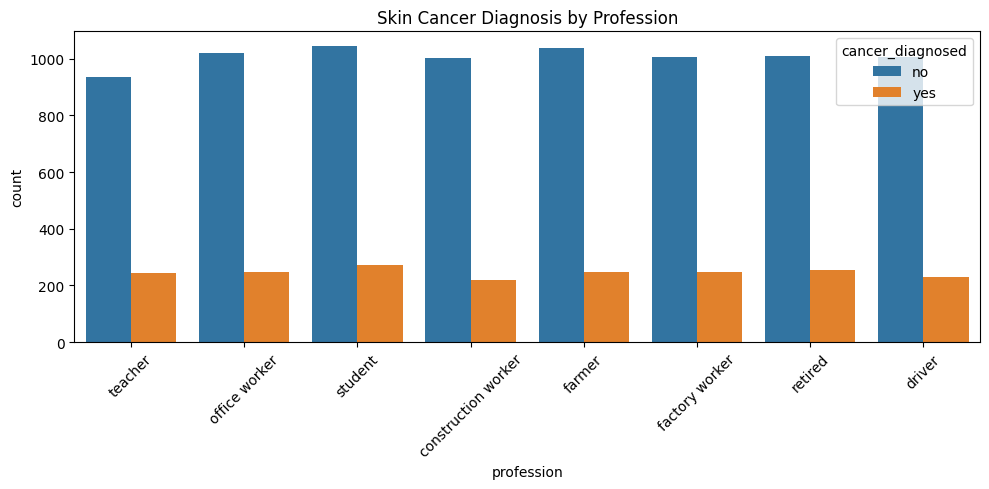

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cancer count by profession
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='profession', hue='cancer_diagnosed')
plt.title("Skin Cancer Diagnosis by Profession")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [53]:
# Sunlight Exposure vs Cancer Diagnosis
sunlight_ct = pd.crosstab(df['sun_exposed'], df['cancer_diagnosed'], normalize='index')
print("Sunlight Exposure vs Cancer Diagnosis:\n", sunlight_ct)

# Chemical Exposure vs Cancer Diagnosis
chemical_ct = pd.crosstab(df['chemical_exposed'], df['cancer_diagnosed'], normalize='index')
print("\nChemical Exposure vs Cancer Diagnosis:\n", chemical_ct)


Sunlight Exposure vs Cancer Diagnosis:
 cancer_diagnosed        no       yes
sun_exposed                         
no                0.799362  0.200638
yes               0.810438  0.189562

Chemical Exposure vs Cancer Diagnosis:
 cancer_diagnosed        no       yes
chemical_exposed                    
no                0.801502  0.198498
yes               0.810538  0.189462


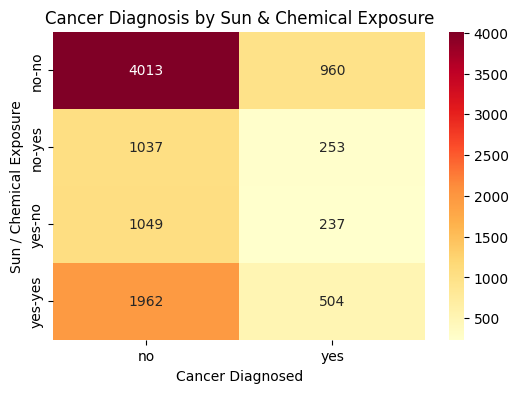

In [68]:
# Group by combinations
heatmap_data = df.groupby(['sun_exposed', 'chemical_exposed', 'cancer_diagnosed']).size().unstack().fillna(0)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlOrRd')
plt.title("Cancer Diagnosis by Sun & Chemical Exposure")
plt.ylabel('Sun / Chemical Exposure')
plt.xlabel('Cancer Diagnosed')
plt.show()

In [55]:
# Save the extended DataFrame to a CSV file
csv_path = "/content/extended_skin_cancer_data.csv"
df.to_csv(csv_path, index=False)
print(f" CSV saved to: {csv_path}")


 CSV saved to: /content/extended_skin_cancer_data.csv


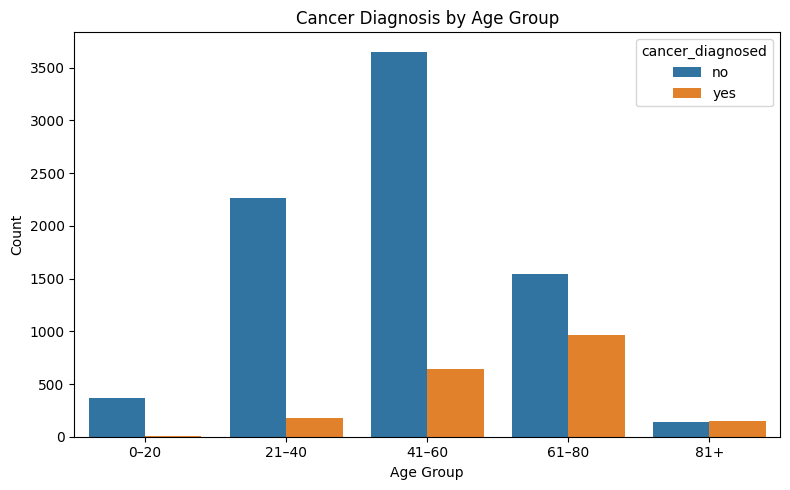

In [69]:
# Create age bins
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100],
                         labels=['0–20', '21–40', '41–60', '61–80', '81+'])

# Plot
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='age_group', hue='cancer_diagnosed')
plt.title('Cancer Diagnosis by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [70]:
import pandas as pd
import random
import numpy as np

# Reload the metadata (if needed)
metadata_path = os.path.join(DATA_PATH, "HAM10000_metadata.csv")
df = pd.read_csv(metadata_path)
df = df.reset_index(drop=True)

# Step 1: Assign random professions
professions = ['farmer', 'teacher', 'construction worker', 'office worker', 'student', 'factory worker', 'driver', 'retired']
df['profession'] = [random.choice(professions) for _ in range(len(df))]

# Step 2: Define exposure logic
sun_exposure_map = {
    'farmer': 'yes',
    'construction worker': 'yes',
    'driver': 'yes',
    'teacher': 'no',
    'office worker': 'no',
    'student': 'no',
    'factory worker': 'no',
    'retired': random.choice(['yes', 'no'])
}
chemical_exposure_map = {
    'factory worker': 'yes',
    'construction worker': 'yes',
    'farmer': 'yes',
    'teacher': 'no',
    'office worker': 'no',
    'student': 'no',
    'driver': 'no',
    'retired': random.choice(['yes', 'no'])
}

df['sun_exposed'] = df['profession'].apply(lambda x: sun_exposure_map.get(x, 'no'))
df['chemical_exposed'] = df['profession'].apply(lambda x: chemical_exposure_map.get(x, 'no'))

# Step 3: Use actual labels to identify cancer diagnosis
cancer_types = ['mel', 'bcc', 'akiec']
df['cancer_diagnosed'] = df['dx'].apply(lambda x: 'yes' if x in cancer_types else 'no')

print("Skew removed — cancer diagnosis now reflects real-world labels.")
df.head()


✅ Skew removed — cancer diagnosis now reflects real-world labels.


,lesion_id,image_id,dx,dx_type,age,sex,localization,profession,sun_exposed,chemical_exposed,cancer_diagnosed
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,construction worker,yes,yes,no
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,office worker,no,no,no
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,factory worker,no,yes,no
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,office worker,no,no,no
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,office worker,no,no,no


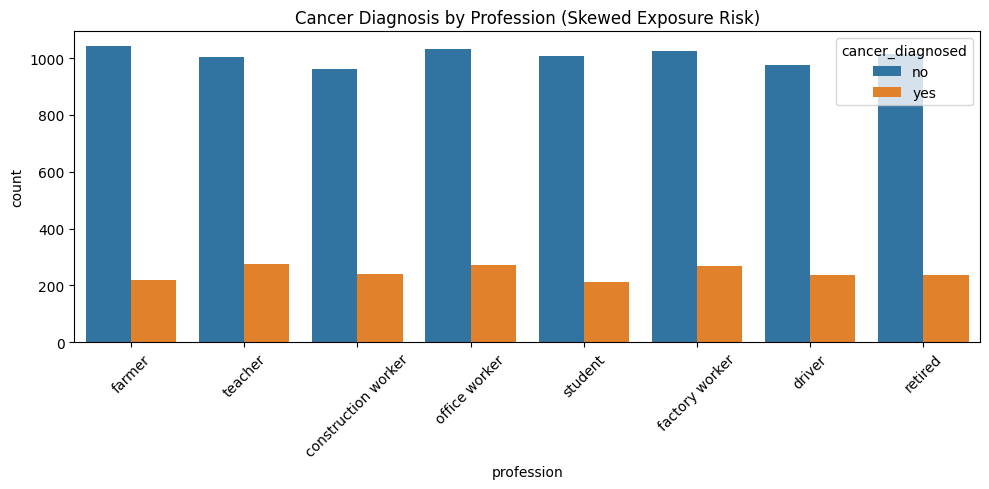

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='profession', hue='cancer_diagnosed', order=professions)
plt.title("Cancer Diagnosis by Profession (Skewed Exposure Risk)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv("/content/extended_skin_cancer_data_skewed.csv", index=False)
from google.colab import files
files.download("/content/extended_skin_cancer_data_skewed.csv")



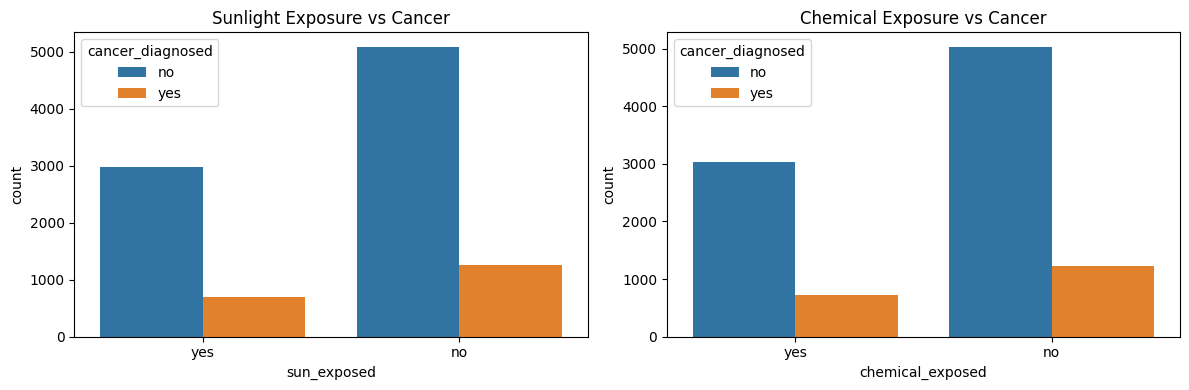

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=df, x='sun_exposed', hue='cancer_diagnosed', ax=ax[0])
ax[0].set_title('Sunlight Exposure vs Cancer')

sns.countplot(data=df, x='chemical_exposed', hue='cancer_diagnosed', ax=ax[1])
ax[1].set_title('Chemical Exposure vs Cancer')

plt.tight_layout()
plt.show()


<ipython-input-75-866ed5d8f103>:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


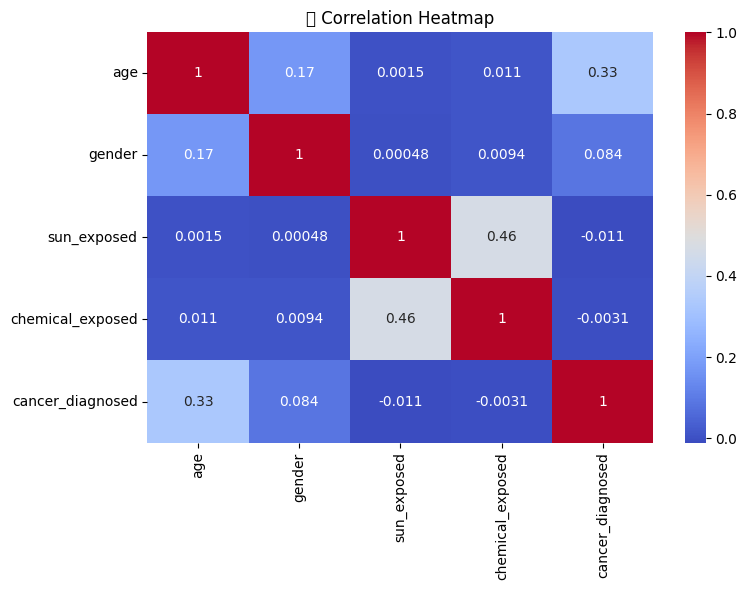

In [75]:
# Prepare numeric-encoded copy of df
df_encoded = df.copy()

# Encode binary and categorical features
df_encoded['cancer_diagnosed'] = df_encoded['cancer_diagnosed'].map({'yes': 1, 'no': 0})
df_encoded['sun_exposed'] = df_encoded['sun_exposed'].map({'yes': 1, 'no': 0})
df_encoded['chemical_exposed'] = df_encoded['chemical_exposed'].map({'yes': 1, 'no': 0})
df_encoded['gender'] = df_encoded['sex'].map({'male': 1, 'female': 0})
df_encoded['retired'] = df_encoded['profession'].map(lambda x: 1 if x == 'retired' else 0)

plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[['age', 'gender', 'sun_exposed', 'chemical_exposed', 'cancer_diagnosed']].corr(),
            annot=True, cmap='coolwarm')
plt.title('📊 Correlation Heatmap')
plt.tight_layout()
plt.show()


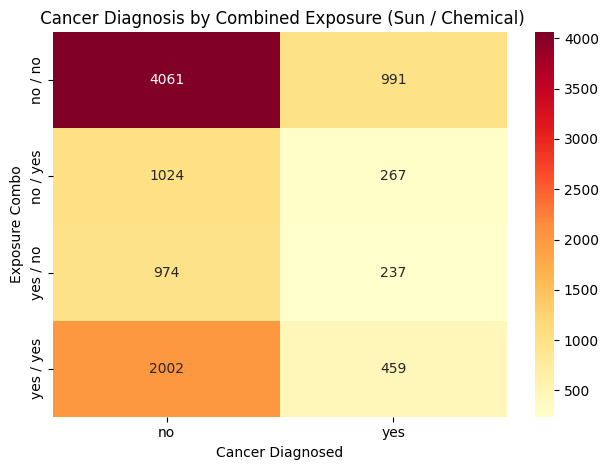

In [76]:
df['exposure_combo'] = df['sun_exposed'] + ' / ' + df['chemical_exposed']

exposure_ct = pd.crosstab(df['exposure_combo'], df['cancer_diagnosed'])
sns.heatmap(exposure_ct, annot=True, cmap='YlOrRd', fmt='d')

plt.title(' Cancer Diagnosis by Combined Exposure (Sun / Chemical)')
plt.ylabel('Exposure Combo')
plt.xlabel('Cancer Diagnosed')
plt.tight_layout()
plt.show()
